# Image Recognition Using Keras


### Image Recognition and Deep Learning

<b>Image recognition</b> is the ability of software to identify things (objects, places, people, writing, etc.) in images, i.e. label an image just as a human would by looking at it e.g. ‘This is a car, this image is a banana’ etc.

<b>Deep Learning using Neural Networks</b> has emerged as the leading approach for several image processing tasks, including image recognition, segmentation, tracking, etc.

---

### Keras
<b>Keras</b> is a library for deep learning ( 1 ). It is a high-level neural networks API, written in Python (compatible with Python 2.7-3.5) and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 

Keras prides itself on the following aspects 
- Allows for easy and fast prototyping through user friendliness, modularity, and extensibility
- Supports convolutional networks and recurrent networks, as well as combinations of the two
- Runs seamlessly on CPU and GPU
---

### VGG16
For Image Recognition, Keras has a number of prebuilt applications. In this tutorial, we shall use an application called VGG16, which is quite popular amongst practitioners.

Simply put, VGG16 is a pretrained neural network model, i.e. it is ready to do work for you. All you have to do is call the predict function. The VGG16 we are going to use was trained on a total of 450,000+ images belonging to 1000 Image Classes, in preparation for the Large Scale Visual Recognition Challenge 2014 (ILSVRC2014). By the way, VGG stands for the name of the group that created this model, i.e. the Visual Geometry Group at University of Oxford



In [1]:
import numpy as np
import keras
import imagenet_labels 
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


The following step imports a prebuilt VGG16 model from the offical Keras github repository for VGG16. input_shape tells VGG16 what the input size should be, every single time. By default, this is 224x224x3 RGB image

In [2]:
vgg16=keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

Let's read an image file and display it using matplotlib, to verify that it is what we think it is

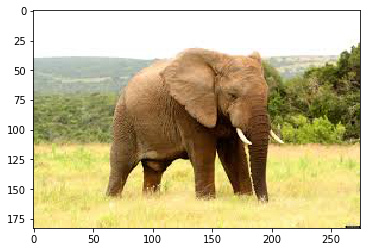

In [3]:
import sys
image=plt.imread('/data/animal1.jpg')
plt.imshow(image)

---
Because we are using the standard / off-the-shelf model, we need to provide inputs in exactly the format it expects, to get proper outputs. So, in the two lines below, we simply resize the image to a 224x224x3 image (for image clarity, start with a larger image than a smaller image, and resize it). We now reshape it to 1x224x224x3, because that’s what the model expects. In fact, if you wanted to predict n images in one shot, you would provide inputs as an n x 224 x 224 x 3 array.

In [9]:
img=scipy.misc.imresize(image, (224,224))
img=img-127.5 # zero centering the image pixel values gives better accuracies, as the original VGG16 model was trained so
pred=vgg16.predict(img.reshape(1,224,224,3))

Remember, *pred* is a 1000 element long list (take a look at the the file*imagenet_labels.py* for the labels) , where each element represents the probability of this image (img) belonging to exactly that one class. So, if we find the element with the highest probability, the index of that element is the class with highest probability 

> class_index = pred.argsort()[-1] 

gives you the index of the last element in the sorted array, i.e. the index of the element with higest probability value

But how do we know which class this is, in real-world terms? Obviously, this must be exactly the same as what the creators of the model used. This is made available in the dictionary *imgnet1000*. You can access this by importing *imagenet_labels.py*

>imagenet_labels.imgnet1000[class_index]  

will show you the class it predicted, and 
> pred[class_index] 

will give the probability of the prediction for that class. We can easily use the above logic to predict the top K classes predicted by the model. The code below is left for you to play with and understand.

In [5]:
def topk(pred, k=3):
    topk=list(pred.argsort()[:,-k:].squeeze())
    topk.reverse()
    return topk

In [10]:
top5=topk(pred,5)
labels=[imagenet_labels.imgnet1000[i] for i in top5]
probabilities=[float(round(pred[0,i],2)) for i in top5]

In [11]:
print(labels)

['tusker', 'African elephant, Loxodonta africana', 'Indian elephant, Elephas maximus', 'triceratops', 'gorilla, Gorilla gorilla']


In [12]:
print(probabilities)

[0.5, 0.47999998927116394, 0.029999999329447746, 0.0, 0.0]
